# Import Libraries


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

print('Pandas version', pd.__version__)
print('Numpy version', np.__version__)

Pandas version 0.20.3
Numpy version 1.14.0


# Load Data


## Load in Crime stats

In [3]:
crimes = pd.read_csv('../data/Crimes_2017.csv')

In [4]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10801165,JA100077,01/01/2017 01:00:00 AM,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,...,42.0,8,08B,1175950.0,1908370.0,2017,02/14/2017 03:49:42 PM,41.903933,-87.629129,"(41.903933222, -87.629128536)"
1,10801166,JA100115,01/01/2017 01:23:00 AM,084XX S SANGAMON ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,...,21.0,71,24,1171453.0,1848804.0,2017,02/14/2017 03:49:42 PM,41.740579,-87.647394,"(41.740578515, -87.64739377)"
2,10801090,JA100010,01/01/2017 12:01:00 AM,064XX S STONY ISLAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,5.0,42,14,1187984.0,1862596.0,2017,02/14/2017 03:49:42 PM,41.778047,-87.586388,"(41.778047465, -87.586387726)"
3,10801213,JA100092,01/01/2017 01:00:00 AM,023XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,12.0,30,08B,1158068.0,1888177.0,2017,02/14/2017 03:49:42 PM,41.848906,-87.695365,"(41.848905706, -87.695364781)"
4,10801214,JA100114,01/01/2017 01:45:00 AM,042XX N DAMEN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE PORCH/HALLWAY,True,False,...,47.0,5,14,1162249.0,1928318.0,2017,02/14/2017 03:49:42 PM,41.958969,-87.678896,"(41.958969376, -87.678896199)"


### Check Location Data

In [5]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265740 entries, 0 to 265739
Data columns (total 22 columns):
ID                      265740 non-null int64
Case Number             265740 non-null object
Date                    265740 non-null object
Block                   265740 non-null object
IUCR                    265740 non-null object
Primary Type            265740 non-null object
Description             265740 non-null object
Location Description    264880 non-null object
Arrest                  265740 non-null bool
Domestic                265740 non-null bool
Beat                    265740 non-null int64
District                265740 non-null int64
Ward                    265739 non-null float64
Community Area          265740 non-null int64
FBI Code                265740 non-null object
X Coordinate            249226 non-null float64
Y Coordinate            249226 non-null float64
Year                    265740 non-null int64
Updated On              265740 non-null object
La

In [20]:
249226/265740

0.9378565515165199

Opps! Only 93% of the data have location values - I want to make sure this is normally distributed and there isn't an entire district that just doesn't collect location data

In [34]:
missing_loc = crimes.groupby('Community Area', as_index=False)[['Location', 'ID']].count()
missing_loc['Percent_Missing'] = [(1 - locs/ids) for index, (locs, ids) in missing_loc[['Location', 'ID']].iterrows()]
missing_loc.sort_values('Percent_Missing', ascending=False).head(5)

,Community Area,Location,ID,Percent_Missing
76,76,1353,1640,0.175000
56,56,1733,1913,0.094093
33,33,1744,1911,0.087389
57,57,767,838,0.084726
11,11,957,1041,0.080692


Whoa! So I see that the Community Area missing the most location data for crimes is Community Area 76 - with over 17% of the crimes missing exact lat/longs. This makes more sense when you realize that community area 76 represents **O'Hare International Airport**

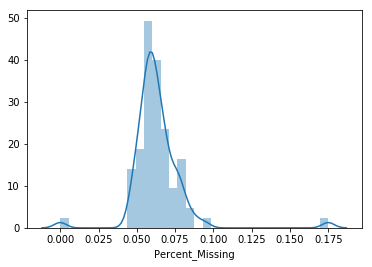

In [31]:
ax = plt.axes()
sns.distplot(missing_loc['Percent_Missing'])

ax.

When we plot the percentage of missing location data for each community area, we see the airport outlier to the right (which makes sense and we don't care about, but there's also an outlier to the left - let's take a look at that one

In [33]:
missing_loc.sort_values('Percent_Missing', ascending=True).head(5)

,Community Area,Location,ID,Percent_Missing
0,0,1,1,0.000000
37,37,836,876,0.045662
66,66,5434,5707,0.047836
13,13,908,954,0.048218
39,39,1437,1510,0.048344


Ok, so Community Area 0 is likely not an area where people live (or presumably go to school) - think forest preserves - and it only has one observation so it's not consequential

Because the rest of the data have a normal distribution of missing location values across all community areas I feel good about only using crime data with lat/long points associated with is

### Subset relevant columns from crime data

In [36]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265740 entries, 0 to 265739
Data columns (total 22 columns):
ID                      265740 non-null int64
Case Number             265740 non-null object
Date                    265740 non-null object
Block                   265740 non-null object
IUCR                    265740 non-null object
Primary Type            265740 non-null object
Description             265740 non-null object
Location Description    264880 non-null object
Arrest                  265740 non-null bool
Domestic                265740 non-null bool
Beat                    265740 non-null int64
District                265740 non-null int64
Ward                    265739 non-null float64
Community Area          265740 non-null int64
FBI Code                265740 non-null object
X Coordinate            249226 non-null float64
Y Coordinate            249226 non-null float64
Year                    265740 non-null int64
Updated On              265740 non-null object
La

In [47]:
crimes_subs = crimes.loc[crimes['Location'].notnull(), ['ID', 
                                                        'Date', 
                                                        'Primary Type', 
                                                        'Arrest', 
                                                        'Community Area',
                                                        'X Coordinate',
                                                        'Y Coordinate',
                                                        'Latitude',
                                                        'Longitude']]

In [48]:
crimes_subs.tail()

,ID,Date,Primary Type,Arrest,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude
265707,11192149,12/31/2017 08:15:00 PM,MOTOR VEHICLE THEFT,False,24,1163365.0,1905356.0,41.895937,-87.675441
265708,11192150,12/28/2017 07:30:00 PM,BATTERY,False,33,1175819.0,1890453.0,41.854771,-87.630149
265709,11192152,12/31/2017 08:48:00 PM,CRIMINAL DAMAGE,False,49,1178256.0,1840091.0,41.716517,-87.622732
265710,11192153,12/30/2017 10:00:00 AM,ASSAULT,False,28,1167714.0,1893522.0,41.863371,-87.659809
265711,11192154,12/31/2017 09:28:00 PM,NARCOTICS,True,29,1150448.0,1894424.0,41.866200,-87.723168


### Pickle raw crime data

In [49]:
# Pickle data after cleaning
crimes_subs.to_pickle('../data/cleaned_crimes.pkl')

## Visualize Crime Data

In [84]:
X_test = crimes_subs.loc[:100000, 'Longitude']
Y_test = crimes_subs.loc[:100000, 'Latitude']

# Coordinate Points In State Plane Illinois East NAD 1983 projection

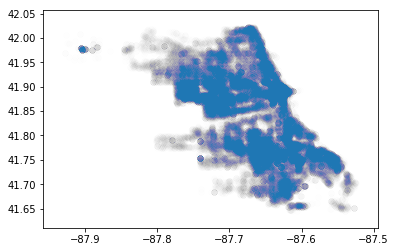

In [85]:
plt.scatter(X_test, Y_test, alpha=0.002)